In [ ]:
# 7/3 model with 1/d term
# is the fit decent enough?
# how can a, b be interpreted

In [1]:
import importlib

import ase.io as aio
from ase.units import Bohr
import numpy as np
import glob

import sys
sys.path.insert(0, '/home/sahre/git_repositories/APDFT/prototyping/atomic_energies/')
import bt_tools as bt
importlib.reload(bt)

from matplotlib import pyplot as plt

def ref_scatter(ref):
    return(np.linspace(np.amin(ref), np.amax(ref), 3))

In [4]:
weighted_core = lambda Ne, Zs, Zp: 2*Zs/Ne + (Ne-2)/Ne*Zp

zs2 = np.array([3.217, 3.847, 4.492, 5.128])
zp2 = np.array([3.136, 3.834, 4.453, 5.100])

zs3 = np.array([4.903, 	5.642, 	6.367, 	7.068])
zp3 = np.array([4.285, 4.886, 5.482, 6.116])

zs4 = np.array([8.044, 	8.944, 	9.758, 	10.553])
zp4 = np.array([6.780, 7.449, 8.287, 9.028])

zs = [zs2, zs3, zs4]
zp = [zp2, zp3, zp4]
ne = [4, 5, 6, 7]
z_eff = []
for rs, rp in zip(zs, zp):
    zr = []
    for s, p, n in zip(rs, rp, ne):
        zr.append(weighted_core(n, s, p))
    z_eff.append(zr)

In [5]:
def key2(x):
    pattern_list = ['CC', 'CN', 'CO', 'CF', 'NN', 'NO', 'NF', 'OO', 'OF', 'FF']
    for i, p in enumerate(pattern_list):
        if p in x:
            return(i)
def key3(x):
    pattern_list = ['SiSi', 'SiP','SiS','SiCl','PP','PS','PCl','SS','SCl','ClCl',]
    for i, p in enumerate(pattern_list):
        if p in x:
            return(i)
def key4(x):
    pattern_list = ['[GeH3][GeH3]', '[GeH3][AsH2]', '[GeH3][SeH]', '[GeH3]Br', '[AsH2][AsH2]', '[AsH2][SeH]', '[AsH2]Br', '[SeH][SeH]', '[SeH]Br', 'BrBr']
    for i, p in enumerate(pattern_list):
        if p in x:
            return(i)

dist_exact2 = bt.get_distances('/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/row_2/diatomics_single/*_opt.xyz', key2)
dist_exact3 = bt.get_distances('/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/row_3/diatomics_single/*_opt.xyz', key3)
dist_exact4 = bt.get_distances('/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/row_4/diatomics_single/*_opt.xyz', key4)
dist_exact = np.concatenate((dist_exact2, dist_exact3, dist_exact4))
dist_exact = np.reshape(dist_exact, (1,30))

In [6]:
e2 = np.loadtxt('/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/row_2/energies_single.txt')
e3 = np.loadtxt('/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/row_3/energies_single.txt')
e4 = np.loadtxt('/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/row_4/energies_single.txt')

nsub = [[0,0,0,0], [0,0,0,0], [0,0,0,0]]

for e, z in zip([e2, e3, e4], z_eff):
    e_nuc = []
    for i in range(len(z)):
        for j in range(i, len(z)):
            e_nuc.append(z[i]*z[j])
#             e_nuc.append(0.0)

    e_nuc = np.array(e_nuc)
    e_el = (e[:,0] - e_nuc).copy()
    e[:,1] = e_el
    e[:,2] = e_nuc

# distances = np.array([10*[1.42] + 10*[2.12] + 10*[2.36]])
distances = dist_exact

distances /= Bohr

energies = np.concatenate((e2, e3, e4), axis = 0)

nuc_charges = [[6, 7, 8, 9], [14, 15, 16, 17], [32, 33, 34, 35]]

<ipython-input-3-baa52057cae7>:9: RuntimeWarning: overflow encountered in power
  comp = -beta**2*(Z1**(gamma**2)+Z2**(gamma**2))+alpha-(b_prime**2)*Z1*Z2


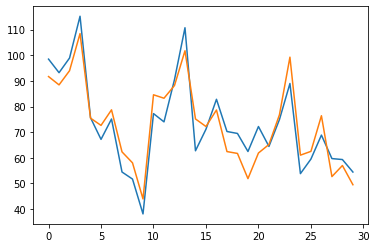

In [8]:
# normal nuclear charges and exponent = 7/3
b_cd = bt.BDE_dist(energies, z_eff, distances)
b_cd.fit(comp_gamma_dist2)

plt.plot(b_cd.bde)
plt.plot(b_cd.bde_fitted)

In [10]:
b_cd.params[0]

array([-5.61579964e+01,  1.88968639e+00,  1.44660413e+00,  1.61740438e+01,
       -3.07969736e-02,  2.33371737e+00])

In [16]:
def comp_gamma(var, alpha, beta, gamma, b_prime):
    Z1, Z2, d = var.T
    comp = -beta**2*(Z1**(gamma**2)+Z2**(gamma**2))+alpha-(b_prime**2)*Z1*Z2
    return(comp)

def dist2(var,a, b):
    Z1, Z2, d = var.T
    dist = a/d+b
    return(dist)

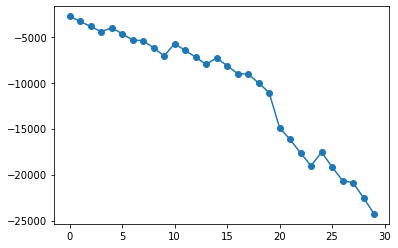

In [15]:
plt.plot(comp_gamma(b_cd.xdata, b_cd.params[0][0], b_cd.params[0][1], b_cd.params[0][2], b_cd.params[0][3]), '-o')

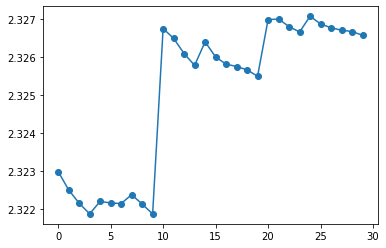

In [17]:
plt.plot(dist2(b_cd.xdata, b_cd.params[0][4], b_cd.params[0][5]), '-o')

In [66]:
labelz = []
for i in range(4, 8):
    for j in range(4, 8):
         labelz.append(str(i)+','+str(j))

In [30]:
xdata = []
for z in z_eff:
    z1z2 = []
    for zi in z:
        for zj in z:
            z1z2.append([zi, zj, 1.0])
    xdata.append(z1z2)
    
xdata = np.array(xdata)

Text(0, 0.5, '$f(Z_1, Z_2)$')

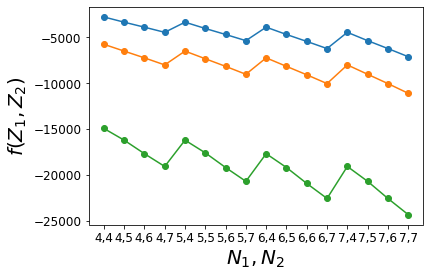

In [80]:
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = [6,4]

plt.plot(labelz, comp_gamma(xdata[0], b_cd.params[0][0], b_cd.params[0][1], b_cd.params[0][2], b_cd.params[0][3]), '-o')
plt.plot(comp_gamma(xdata[1], b_cd.params[0][0], b_cd.params[0][1], b_cd.params[0][2], b_cd.params[0][3]), '-o')
plt.plot(comp_gamma(xdata[2], b_cd.params[0][0], b_cd.params[0][1], b_cd.params[0][2], b_cd.params[0][3]), '-o')

plt.xlabel('$N_1, N_2$', fontsize=20)
plt.ylabel(r'$f(Z_1, Z_2)$', fontsize=20)

In [61]:
indices = {'00': 0,
 '01': 1,
 '02': 2,
 '03': 3,
 '10': 1,
 '11': 4,
 '12': 5,
 '13': 6,
 '20': 2,
 '21': 5,
 '22': 7,
 '23': 8,
 '30': 3,
 '31': 6,
 '32': 8,
 '33': 9}

xdata_dist = []
for d in [dist_exact2, dist_exact3, dist_exact4]:
    d_tmp = []
    for i in range(4):
        for j in range(4):
            d_tmp.append([1,1,d[indices[f'{i}{j}']]])
    xdata_dist.append(d_tmp)
xdata_dist = np.array(xdata_dist)

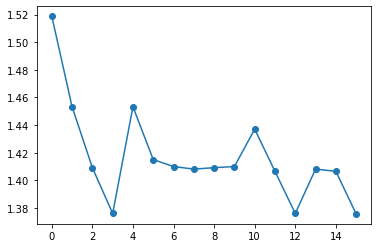

In [55]:
plt.plot(xdata_dist[0], '-o')

Text(0, 0.5, '$\\frac{a}{d}+b$')

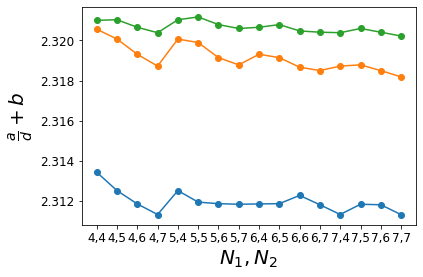

In [78]:
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = [6,4]

plt.plot(labelz, dist2(xdata_dist[0], b_cd.params[0][4], b_cd.params[0][5]), '-o')
plt.plot(labelz, dist2(xdata_dist[1], b_cd.params[0][4], b_cd.params[0][5]), '-o')
plt.plot(labelz, dist2(xdata_dist[2], b_cd.params[0][4], b_cd.params[0][5]), '-o')

plt.xlabel('$N_1, N_2$', fontsize=20)
plt.ylabel(r'$\frac{a}{d}+b$', fontsize=20)

In [65]:
labelz

[]